# Algorytmy genetyczne lab2 - cutting stock
## Dawid Przybyliński

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class cutting_stock_evolution:
    
    def __init__(self, rectangles, r = 300):
        self.rect = np.asarray(rectangles.split()).reshape(-1,3).astype(int)
        self.rect_num = self.rect.shape[0]
        self.r = r
        self.best = None
        self.generation_mean = []
            
            
    def initialize(self, n, max_failures=150):
        self.n = n
        population = []
        for i in range(n):
            # single creature
            creature = []
            keep_trying = True
            while keep_trying:
                rect = self.try_putting_rect(creature, max_failures)
                if rect:
                    creature += rect
                else:
                    keep_trying = False
            population.append(creature)
        self.generation = population
     
    def try_putting_rect(self, creature, max_failures):
        """
        próbuje losowo wstawić nowy prostokąt do genotypu osobnika
        po max_failures nieudanych próbach zwraca None
        """
        for i in range(max_failures):
            [x,y] = np.random.uniform(-self.r, self.r, 2)
            [h,w,v] = evo.rect[np.random.randint(self.rect_num)]
            rect = [x,y,h,w,v]
            overlap_circle = self.rectangle_out_of_circle(rect)
            overlap_rectangle = False
            rect_idx = 0
            while not overlap_rectangle and rect_idx < len(creature):
                overlap_rectangle = self.rectangles_overlap([x,y,h,w], creature[rect_idx:rect_idx+5])
                rect_idx += 5
            if not overlap_circle and not overlap_rectangle:
                return rect
        return None
    
    
    def rectangles_overlap(self, rect1, rect2):
        """
        check whether 2 rectangles overlap, horizontal and vertical separately, then combine 
        rectangles can have their sides connected
        """
        v_overlap = not(rect1[1]+rect1[2] <= rect2[1] or rect2[1]+rect2[2] <= rect1[1])     
        h_overlap = not(rect1[0]+rect1[3] <= rect2[0] or rect2[0]+rect2[3] <= rect1[0])
        return v_overlap and h_overlap
    
    def rectangle_out_of_circle(self, rect1):
        """
        check whether rectangle is out of circle
        """
        [x,y,h,w] = rect1[0:4]
        return any([x**2+y**2>self.r**2, (x+w)**2+y**2>self.r**2,x**2+(y+h)**2>self.r**2,(x+w)**2+(y+h)**2>self.r**2])
    
    def visualize(self, osobnik, values = True):
        plt.figure(figsize=(4, 4), dpi=120)
        x = np.linspace(-self.r, self.r, 1000)
        plt.plot(x, np.sqrt(self.r**2 - x**2), c="black", linewidth=1)
        plt.plot(x, -np.sqrt(self.r**2 - x**2), c="black", linewidth=1)
        idx = 0
        while idx < len(osobnik):
            [x,y,h,w,v] = osobnik[idx:idx+5]
            plt.plot([x,x,x+w,x+w,x],[y,y+h,y+h,y,y], c='blue', linewidth=0.7)
            if values:
                plt.text(x,y+h/2,str(v), size=7)
            idx+=5
        plt.show()
        
    def evaluate(self, osobnik):
        idx = 0
        value = 0 
        while idx < len(osobnik):
            value += osobnik[idx+4]
            idx += 5
        return value
    
    def mutate(self, osobnik, eta=1):    
        """
        mutacja - wszystkie prostokąty są przyciągane w losowym kierunku
        """
        direction = np.random.randint(4)
        if direction == 0:
            mutant = self.mutate_up(osobnik, eta)
        if direction == 1:
            mutant = self.mutate_right(osobnik, eta)
        if direction == 2:
            mutant = self.mutate_down(osobnik, eta)
        if direction == 3:
            mutant = self.mutate_left(osobnik, eta)
        
        keep_trying = True
        while keep_trying:
            rect = self.try_putting_rect(mutant, 100)
            if rect:
                mutant += rect
            else:
                keep_trying = False
        return mutant
        
    def mutate_up(self, osobnik, eta=1):
        values = []
        idx = 0 
        while idx < len(osobnik):
            values.append(osobnik[idx+1]+osobnik[idx+2]) # y+h
            idx += 5
        args_sorted = np.argsort(values)
        mutant = []
        for i in reversed(args_sorted):
            keep_going = True
            [x,y,h,w,v] = osobnik[5*i:5*i+5]
            while keep_going:
                if self.rectangle_out_of_circle([x,y+eta,h,w,v]):
                    keep_going = False
                mutant_idx = 0
                while mutant_idx < len(mutant) and keep_going:
                    if self.rectangles_overlap([x,y+eta,h,w,v], mutant[mutant_idx:mutant_idx+5]):
                        keep_going = False
                    mutant_idx += 5
                if keep_going:
                    y += eta
            mutant += [x,y,h,w,v]
        return mutant
    
    def mutate_down(self, osobnik, eta=1):
        values = []
        idx = 0 
        while idx < len(osobnik):
            values.append(osobnik[idx+1]) # y
            idx += 5
        args_sorted = np.argsort(values)
        mutant = []
        for i in args_sorted:
            keep_going = True
            [x,y,h,w,v] = osobnik[5*i:5*i+5]
            while keep_going:
                if self.rectangle_out_of_circle([x,y-eta,h,w,v]):
                    keep_going = False
                mutant_idx = 0
                while mutant_idx < len(mutant) and keep_going:
                    if self.rectangles_overlap([x,y-eta,h,w,v], mutant[mutant_idx:mutant_idx+5]):
                        keep_going = False
                    mutant_idx += 5
                if keep_going:
                    y -= eta
            mutant += [x,y,h,w,v]
        return mutant
            
    def mutate_right(self, osobnik, eta=1):
        values = []
        idx = 0 
        while idx < len(osobnik):
            values.append(osobnik[idx]+osobnik[idx+3]) # x+w
            idx += 5
        args_sorted = np.argsort(values)
        mutant = []
        for i in reversed(args_sorted):
            keep_going = True
            [x,y,h,w,v] = osobnik[5*i:5*i+5]
            while keep_going:
                if self.rectangle_out_of_circle([x+eta,y,h,w,v]):
                    keep_going = False
                mutant_idx = 0
                while mutant_idx < len(mutant) and keep_going:
                    if self.rectangles_overlap([x+eta,y,h,w,v], mutant[mutant_idx:mutant_idx+5]):
                        keep_going = False
                    mutant_idx += 5
                if keep_going:
                    x += eta
            mutant += [x,y,h,w,v]
        return mutant
    
    def mutate_left(self, osobnik, eta=1):
        values = []
        idx = 0 
        while idx < len(osobnik):
            values.append(osobnik[idx]) # x
            idx += 5
        args_sorted = np.argsort(values)
        mutant = []
        for i in args_sorted:
            keep_going = True
            [x,y,h,w,v] = osobnik[5*i:5*i+5]
            while keep_going:
                if self.rectangle_out_of_circle([x-eta,y,h,w,v]):
                    keep_going = False
                mutant_idx = 0
                while mutant_idx < len(mutant) and keep_going:
                    if self.rectangles_overlap([x-eta,y,h,w,v], mutant[mutant_idx:mutant_idx+5]):
                        keep_going = False
                    mutant_idx += 5
                if keep_going:
                    x -= eta
            mutant += [x,y,h,w,v]
        return mutant
    
    def cross(self, osobnik1, osobnik2):
        child1 = []
        child2 = []
        decision = np.random.randint(2)
        if decision == 0:
            # horizontal split - y>0 or y+h<0
            idx = 0 
            while idx < len(osobnik1):
                rect = osobnik1[idx:idx+5]
                if rect[1] > 0:
                    child1 += rect
                elif rect[1]+rect[2]<0:
                    child2 += rect
                idx+=5
            idx = 0 
            while idx < len(osobnik2):
                rect = osobnik2[idx:idx+5]
                if rect[1] > 0:
                    child2 += rect
                elif rect[1]+rect[2]<0:
                    child1 += rect
                idx+=5
        if decision == 1:
            # vertical split x>0 or x+w < 0 
            idx = 0 
            while idx < len(osobnik1):
                rect = osobnik1[idx:idx+5]
                if rect[0] > 0:
                    child1 += rect
                elif rect[0]+rect[3]<0:
                    child2 += rect
                idx+=5
            idx = 0 
            while idx < len(osobnik2):
                rect = osobnik2[idx:idx+5]
                if rect[0] > 0:
                    child2 += rect
                elif rect[0]+rect[3]<0:
                    child1 += rect
                idx+=5
        
        keep_trying = True
        while keep_trying:
            rect = self.try_putting_rect(child1, 100)
            if rect:
                child1 += rect
            else:
                keep_trying = False
        keep_trying = True
        while keep_trying:
            rect = self.try_putting_rect(child2, 100)
            if rect:
                child2 += rect
            else:
                keep_trying = False
        
        return [child1, child2]
    
                
            
    def crossover(self,parents):
        """
        krzyżowanie
        """
        children = []
        for i in range(0, len(parents)-1, 2):
            [child_1, child_2] = self.cross(parents[i], parents[i+1])
            children.append(child_1)
            children.append(child_2)
        return children
        
    
    def evolve(self, epochs = 100, p_cross = 0.7, p_mutate = 0.5):
        """
        główna funkcja przeprowadzająca ewolucję i szukająca maksimum
        """
        iteration_counter = 0
        current_best_value = -1
        while True:
            
            # check stop condition 
            if iteration_counter == epochs:
                return self.evaluate(self.best)
            iteration_counter += 1
            print("Epoch: {}/{}".format(iteration_counter,epochs), end='\r')
            
            # crossover
            parents = [self.generation[i] for i in np.random.choice(self.n, int(np.floor(p_cross*self.n)), replace=False)]
            crossed = self.crossover(parents)
            population = self.generation + crossed
            pop_size = len(population)
            
            # mutation
            to_mutate = []
            for i in np.random.choice(pop_size, int(np.floor(p_mutate*pop_size)), replace=False):
                to_mutate.append(population[i])
            mutated = [self.mutate(osobnik_to_mutate) for osobnik_to_mutate in to_mutate]
            population = population + mutated
            
            # evaluation
            values = np.asarray([self.evaluate(osobnik) for osobnik in population])
            self.generation_mean.append(np.mean(values))
            best_value_index = np.argmax(values)
            if values[best_value_index] > current_best_value:
                self.best = population[best_value_index]
                current_best_value = values[best_value_index]
            
            # selection
            prob = values/values.sum()
            choices = np.random.choice([i for i in range(len(population))], size=self.n, p=prob)
            self.generation = [population[choice] for choice in choices]



## Wyjaśnienie zaproponowanych metod
W przykładach wyjaśniających metodologię będziemy przyjmować 3 możliwe prostokąty o wartościach (wysokość, szerokość, wartość) kolejno: (100, 50, 2); (100, 100, 3); (30, 70, 1) oraz koło o promieniu 300.

### Inicjalizacja
Dla każdego osobnika próbujemy wstawiać prostokąty w losowych miejscach, proces kończymy po określonej liczbie (tutaj 150) prób. Przykładowo zainicjowany osobnik:

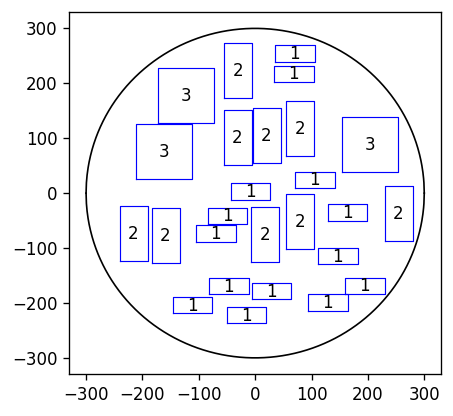

In [3]:
evo = cutting_stock_evolution("100 50 2 100 100 3 30 70 1")
evo.initialize(1)
evo.visualize(evo.generation[0])

## Mutacja
Mutacja polega na wylosowaniu kierunku (góra, prawo, dół lub lewo), a następnie możliwie dużym przesunięciu wszytkich prostokątów w wylosowanym kierunku. Na końcu następuje próba losowego wypełnienia powstałej przestrzeni prostokątami. Poniżej przykładowa mutacja zainicjowanego już osobnika:

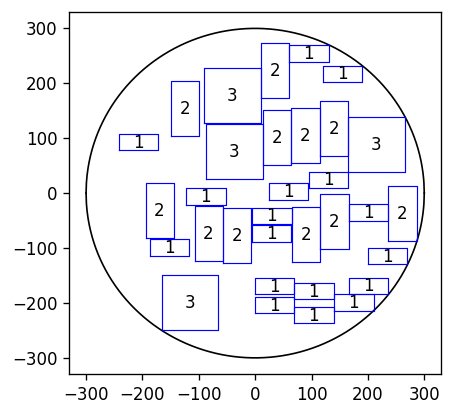

In [4]:
evo.visualize(evo.mutate(evo.generation[0]))

## Krzyżowanie
Z dwojga osobników powstaje dwójka potomków. Losowana jest oś (pozioma lub pionowa), a następnie potomkowie powstają przez złożenie prostokątów znajdujących się całkowicie po jednej stronie osi z pierwszego rodzica oraz prostokątów znajdujących się całkowicie po drugiej stronie osi z drugiego rodzica. Na końcu znowu następuje próba losowego wypełnienia powstałej przestrzeni prostokątami. Poniżej przykładowe krzyżowanie, dla lepszego efektu, krzyżowane zostaną 2 osobniki, zmutowane w przeciwnych kierunkach:

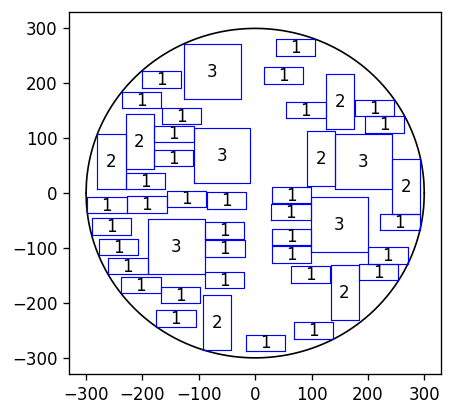

In [13]:
evo.initialize(2)
evo.visualize(evo.cross(evo.mutate_right(evo.generation[0]), evo.mutate_left(evo.generation[1]))[0])

## Ewaluacja oraz selekcja
Funkcją celu jest suma wartości wszystkich prostokątów osobnika. Selekcja odbywa się za pomocą metody ruletkowej.
## Uwagi
Zarówno mutacja jak i krzyżowanie tworzy zazwyczaj niewielką przestrzeń, która mogłaby być zapełniona, jednak losowe wstawianie prostokątów nie jest w stanie jej efektywnie zapełnić. Z tego względu wyniki algorytmu, prawdopodobnie pomimo że coraz lepsze, będą zawierały takie wolne przestrzenie

## Testowanie
### Pierwszy zestaw danych

In [107]:
evo = cutting_stock_evolution("250 120 100 320 160 500 250 160 600 150 120 40 400 30 400", r=800)
evo.initialize(30)
evo.evolve(120)

21900

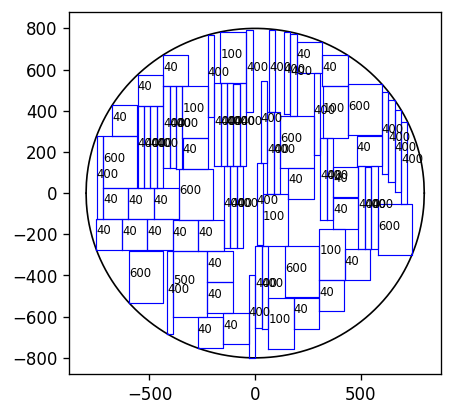

In [108]:
evo.visualize(evo.best, values=True)

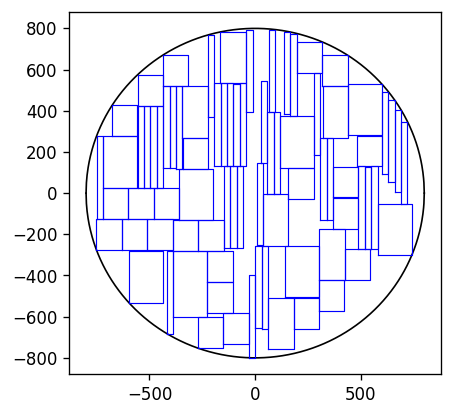

In [109]:
evo.visualize(evo.best, values=False)

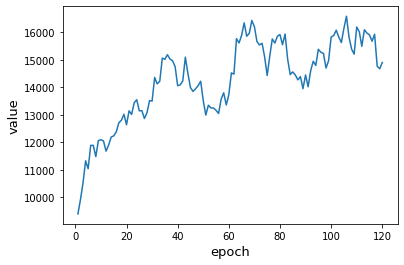

In [115]:
plt.plot(np.linspace(1,120,120), evo.generation_mean)
plt.xlabel("epoch", size=13)
plt.ylabel("value", size=13)
plt.show()

### Drugi zestaw danych

In [3]:
evo = cutting_stock_evolution("10 120 120 120 10 150 400 20 1200 300 30 1200 120 120 1200 100 100 900 450 80 11000", r=850)
evo.initialize(30)
evo.evolve(120)

188790

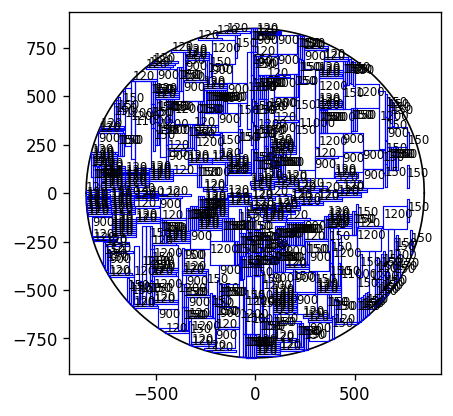

In [4]:
evo.visualize(evo.best, values=True)

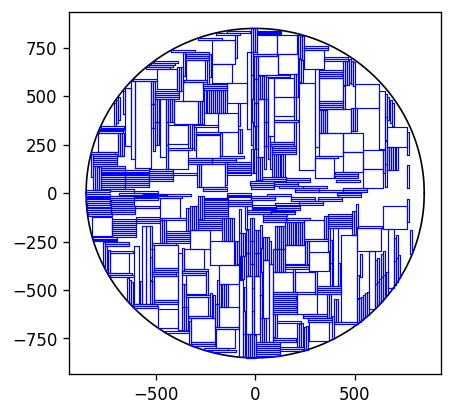

In [5]:
evo.visualize(evo.best, values=False)

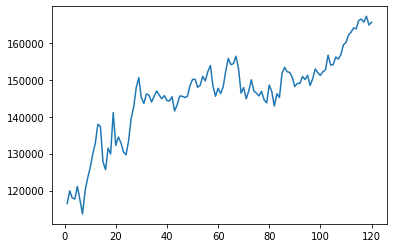

In [6]:
plt.plot(np.linspace(1,120,120), evo.generation_mean)
plt.show()

### Trzeci zestaw danych

In [59]:
evo = cutting_stock_evolution("200 120 200 200 160 300 250 160 500 100 120 40", r=1000)
evo.initialize(40)
evo.evolve(60)

18100

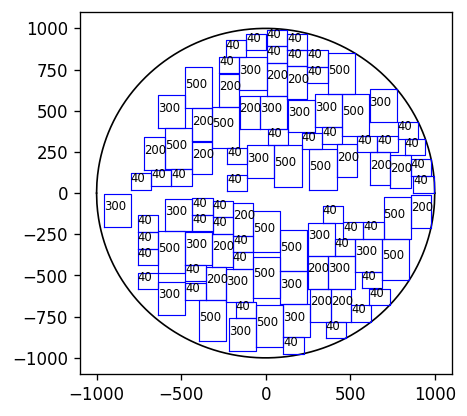

In [60]:
evo.visualize(evo.best, values=True)

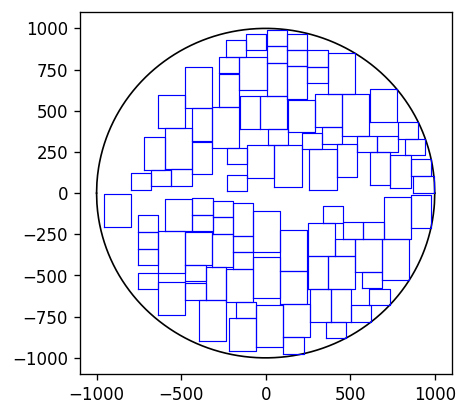

In [62]:
evo.visualize(evo.best, values=False)

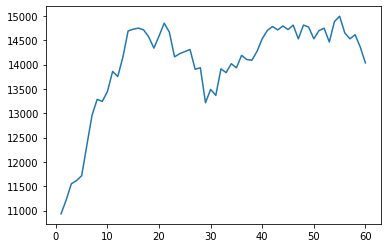

In [61]:
plt.plot(np.linspace(1,60,60), evo.generation_mean)
plt.show()

### Czwarty zestaw danych

In [63]:
evo = cutting_stock_evolution("250 120 100 120 360 600 250 160 600 150 120 40", r=1100)
evo.initialize(30)
evo.evolve(80)

23340

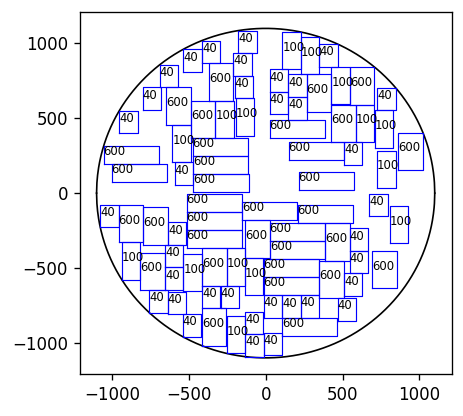

In [64]:
evo.visualize(evo.best, values=True)

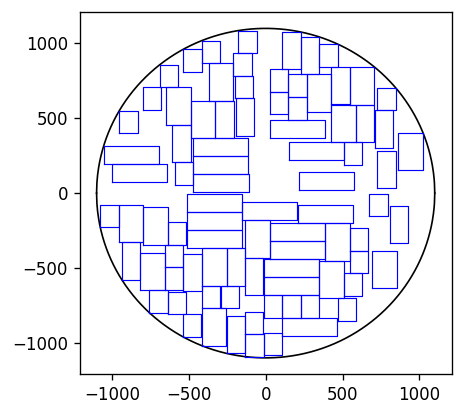

In [65]:
evo.visualize(evo.best, values=False)

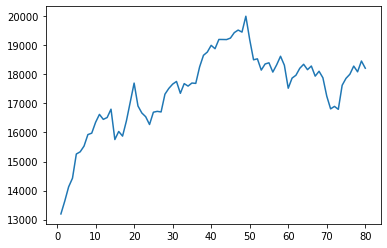

In [66]:
plt.plot(np.linspace(1,80,80), evo.generation_mean)
plt.show()

### Piąty zestaw danych

In [67]:
evo = cutting_stock_evolution("200 120 200 200 160 300 250 160 500 100 120 40", r=1200)
evo.initialize(30)
evo.evolve(80)

25080

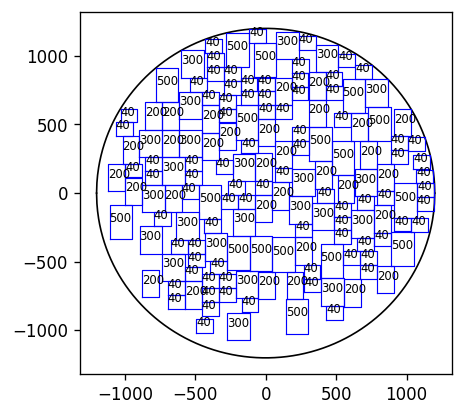

In [68]:
evo.visualize(evo.best, values=True)

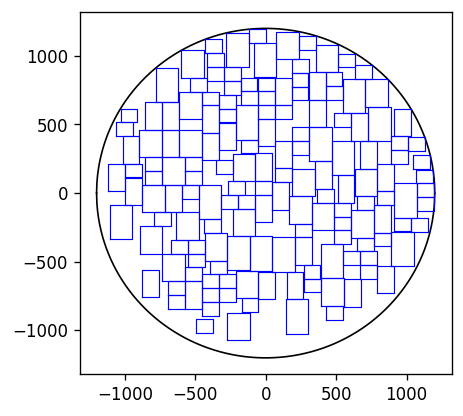

In [69]:
evo.visualize(evo.best, values=False)

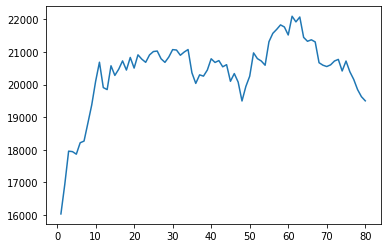

In [70]:
plt.plot(np.linspace(1,80,80), evo.generation_mean)
plt.show()

In [103]:
def v(osobnik, values = True):
    plt.figure(figsize=(3, 3), dpi=120)
    x = np.linspace(-300, 300, 1000)
    plt.plot(x, np.sqrt(300**2 - x**2), c="black", linewidth=0.5)
    plt.plot(x, -np.sqrt(300**2 - x**2), c="black", linewidth=0.5)
    plt.axis('off')
    idx = 0
    while idx < len(osobnik):
        [x,y,h,w,v] = osobnik[idx:idx+5]
        plt.plot([x,x,x+w,x+w,x],[y,y+h,y+h,y,y], c='blue', linewidth=0.4)
        if values:
            plt.text(x,y+h/2,str(v), size=7)
        idx+=5
    #plt.savefig("gen_images/2_4.png")
    plt.show()

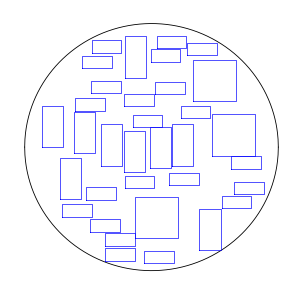

In [99]:
evo = cutting_stock_evolution("100 50 2 100 100 3 30 70 1")
evo.initialize(1)
v(evo.generation[0], values=False)

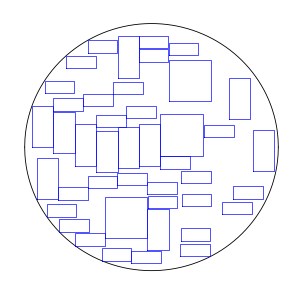

In [101]:
v(evo.mutate(evo.generation[0]), values=False)

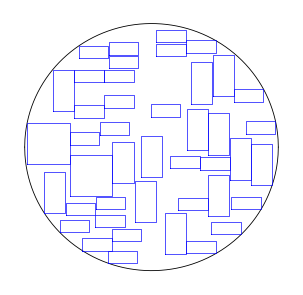

In [105]:
evo.initialize(2)
v(evo.cross(evo.mutate_right(evo.generation[0]), evo.mutate_left(evo.generation[1]))[0], values=False)